In [7]:
# Pandas
import pandas as pd

# SQL Alchemy
from sqlalchemy import create_engine
from config import username , password
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Connecting to postgres database

dbname='data_modeling_db'
servername='localhost'
port=5432
conn = f'postgres://{username}:{password}@{servername}:{port}/{dbname}'
engine = create_engine(conn , echo = False)
connect = engine.connect()

In [9]:
# Reading data from postgres and converting into pandas dataframe

salaries_df = pd.read_sql("SELECT * FROM salaries", conn)

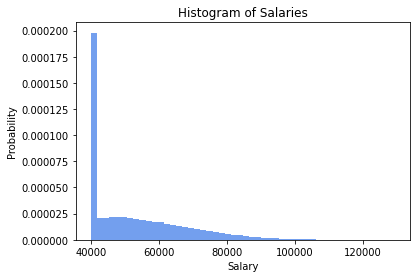

In [14]:
# Generating histogram

plt.hist(salaries_df.loc[:, 'salary'],50,density=True, facecolor='cornflowerblue', alpha=0.9)
plt.xlabel('Salary')
plt.ylabel('Probability')
plt.title('Histogram of Salaries')
plt.show()

In [53]:
# Reading data from postgres and converting into pandas dataframe

avg_salary_by_title_df = pd.read_sql('select * from avg_salary_by_title', conn)

avg_salary_by_title_df['round'] = avg_salary_by_title_df['round'].round().astype(int)

avg_salary_by_title_df

,title,round
0,Assistant Engineer,48564
1,Engineer,48535
2,Manager,51531
3,Senior Engineer,48507
4,Senior Staff,58550
5,Staff,58465
6,Technique Leader,48583


In [54]:
# Preparing dataframe for bar chart

indexed_avg_salary_by_title_df = avg_salary_by_title_df.set_index('title')

indexed_avg_salary_by_title_df = indexed_avg_salary_by_title_df['round'].sort_values(ascending=False)

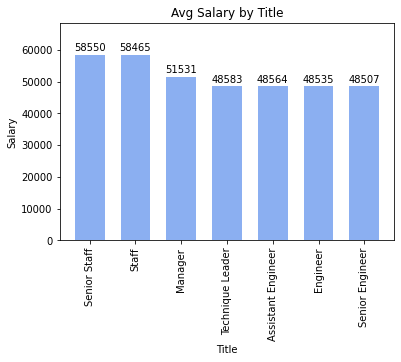

In [56]:
# Generating bar chart

fig, ax = plt.subplots()

x_axis = np.arange(len(indexed_avg_salary_by_title_df))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, indexed_avg_salary_by_title_df.keys(), rotation=90)

y_axis = indexed_avg_salary_by_title_df.values


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Salary')
ax.set_title('Avg Salary by Title')
ax.set_xlabel('Title')
ax.set_ylim(0,indexed_avg_salary_by_title_df.values.max()+10000)


def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

plt.show()